In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/RFM Analysis Dataset4.csv")

In [ ]:
print(data)

        Unnamed: 0 InvoiceNo StockCode                          Description  \
0                0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1                1    536365     71053                  WHITE METAL LANTERN   
2                2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3                3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4                4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...            ...       ...       ...                                  ...   
406824      541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
406825      541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
406826      541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
406827      541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
406828      541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity         InvoiceDate  UnitPrice  Cu

In [ ]:
data = data[(data['Quantity'] > 0) & (data['CustomerID'].notnull())]

In [ ]:

data = data[(data['Quantity'] > 0) & (data['CustomerID'].notnull())].copy()


data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [ ]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [ ]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': 'max',
    'InvoiceNo': pd.Series.nunique,
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'LastPurchaseDate',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

In [ ]:
ref_date = pd.to_datetime('2011-12-10')
rfm['Recency'] = (ref_date - rfm['LastPurchaseDate']).dt.days

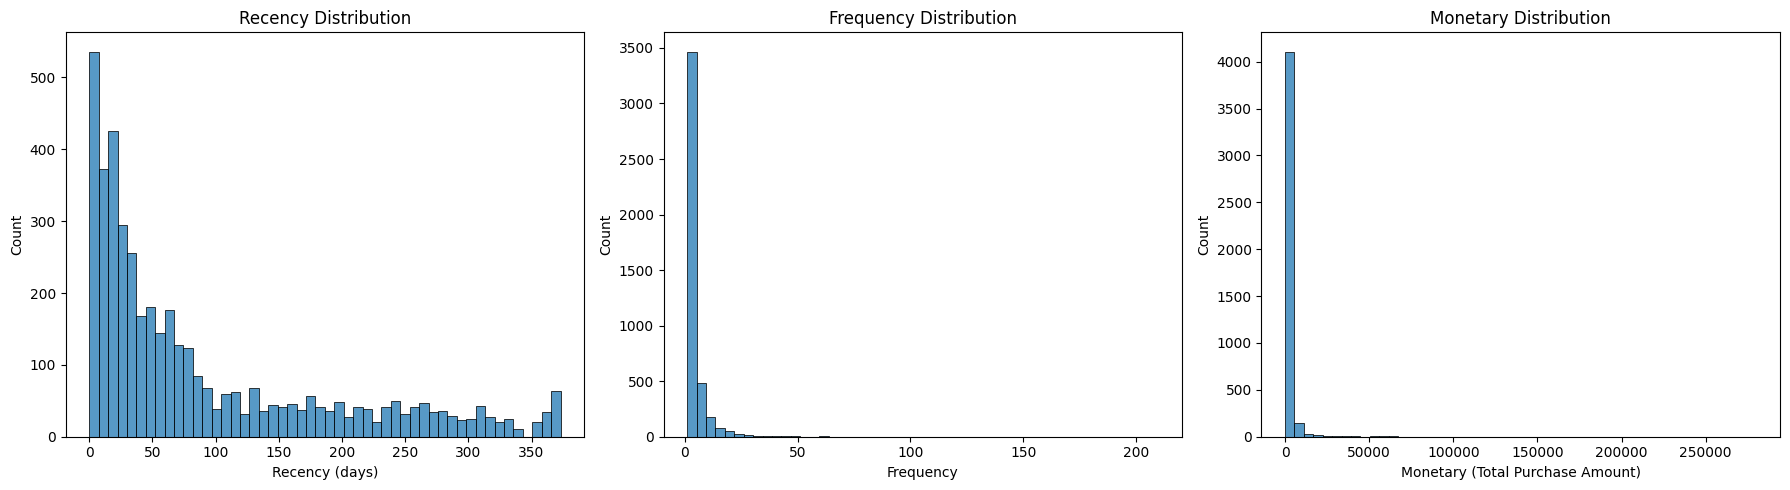

In [ ]:
plt.figure(figsize=(18, 5))

# Recency 히스토그램
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=50, kde=False)
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Count')

# Frequency 히스토그램
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=50, kde=False)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

# Monetary 히스토그램
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=50, kde=False)
plt.title('Monetary Distribution')
plt.xlabel('Monetary (Total Purchase Amount)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 기준 설정
* Recency
 * 최근과 오래된 구매 시점의 고객을 확실히 가려내고, 중간층을 구간별로 세분화하기 위해 10%, 35%, 65%, 90% 분위수를 사용

* Frequency
  * 다수 고객이 1~2회 구매에 몰려 있으므로, 빈도가 올라갈수록 충성도가 급격히 높아진다는 점을 고려해 상위 구간을 세분화

* Monetary
  * 최고 5% VIP와 최저 10% 소액 구매 고객을 뚜렷이 구분하고, 그 외 구간을 여러 단계로 나누어 중간층을 세밀하게 평가

In [ ]:
print("Recency 분위수:")
print(rfm['Recency'].quantile([0.1, 0.35, 0.65, 0.9]))
print("\nFrequency 분위수:")
print(rfm['Frequency'].quantile([0.35, 0.7, 0.85, 0.95]))
print("\nMonetary 분위수:")
print(rfm['Monetary'].quantile([0.1, 0.35, 0.7, 0.95]))

Recency 분위수:
0.10      5.0
0.35     26.0
0.65     85.0
0.90    262.2
Name: Recency, dtype: float64

Frequency 분위수:
0.35     2.0
0.70     4.0
0.85     7.0
0.95    13.0
Name: Frequency, dtype: float64

Monetary 분위수:
0.10     156.566
0.35     411.551
0.70    1353.740
0.95    5840.182
Name: Monetary, dtype: float64


데이터의 밀도 분포를 연속적인 곡선으로 나타내어 노이즈를 줄이고 전반적인 분포 패턴을 쉽게 파악하기 위해 KDE

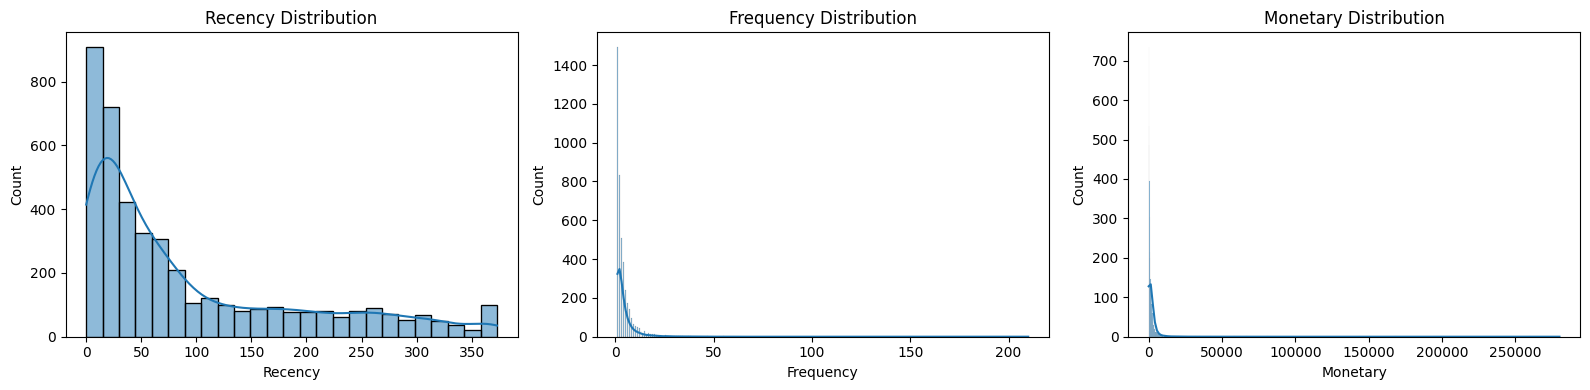

In [ ]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()
